In [1]:
#Decision Tree to predict Speed
#Random forest Speed prediction

# import required libraries
import pandas as pd

In [2]:
#import and read dataset. Investigate 5 top rows
df = pd.read_csv('data_proc.csv')
df.head()


,Time,Forefoot,Midfoot,Heel,Total,Incline,Speed,Speed2
0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN
1,0.01,62.01,129.85,104.94,296.80,NaN,NaN,NaN
2,0.02,62.01,127.20,102.29,291.50,NaN,NaN,NaN
3,0.03,62.01,124.55,104.94,291.50,NaN,NaN,NaN
4,0.04,57.24,124.55,104.94,286.73,NaN,NaN,NaN


In [3]:
#remove rows with missing data
df = df.dropna()
df

,Time,Forefoot,Midfoot,Heel,Total,Incline,Speed,Speed2
37376,373.76,0.0,0.00,2.49,2.49,10.0,0.8,slow
37377,373.77,0.0,0.00,4.98,4.98,10.0,0.8,slow
37378,373.78,0.0,0.00,4.98,4.98,10.0,0.8,slow
37379,373.79,0.0,0.00,4.98,4.98,10.0,0.8,slow
37380,373.80,0.0,0.00,4.98,4.98,10.0,0.8,slow
...,...,...,...,...,...,...,...,...
131540,1315.40,0.0,5.00,10.00,15.00,25.0,1.6,fast
131541,1315.41,0.0,5.00,10.00,15.00,25.0,1.6,fast
131542,1315.42,0.0,5.00,10.00,15.00,25.0,1.6,fast
131543,1315.43,0.0,5.00,10.00,15.00,25.0,1.6,fast


In [4]:
df['Speed2']=df['Speed2'].replace('slow',0).replace('medium',1).replace('fast',2)

In [5]:
#separate the features (X) and the label
X = df.drop(["Time","Speed","Speed2"], axis=1)
y = df["Speed2"]

In [6]:
from sklearn.tree import DecisionTreeClassifier 
#training our random forest model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:
#make predictions with our model
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 1, 0])

In [8]:
predictions = clf.predict(X_test)

clf.predict_proba(X_test)

#show the order of the classes 
clf.classes_

array([0, 1, 2])

In [9]:
#show how important each feature during prediction
importances=clf.feature_importances_
columns=X.columns
i=0

while i<len(columns):
    print(f"The importance of feature' {columns[i]} 'is {round(importances[i]*100,2)}%.")
    i+=1

The importance of feature' Forefoot 'is 18.11%.
The importance of feature' Midfoot 'is 26.6%.
The importance of feature' Heel 'is 22.09%.
The importance of feature' Total 'is 24.36%.
The importance of feature' Incline 'is 8.84%.


              precision    recall  f1-score   support

           0       0.73      0.78      0.75      6999
           1       0.60      0.57      0.58      4493
           2       0.71      0.66      0.68      3705

    accuracy                           0.69     15197
   macro avg       0.68      0.67      0.67     15197
weighted avg       0.69      0.69      0.69     15197



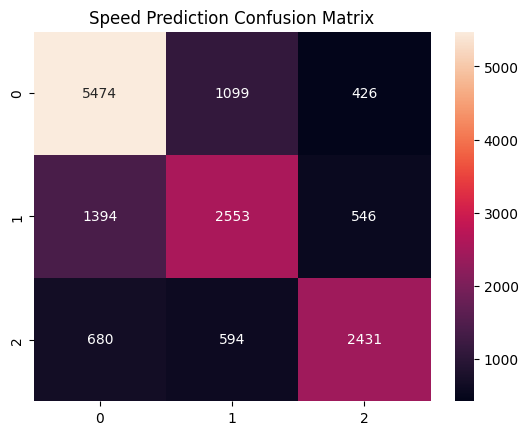

In [10]:
#evaluate the performance of our model
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True,fmt='d').set_title("Speed Prediction Confusion Matrix")

print(classification_report(y_test,predictions))

In [28]:
#Decision Tree to predict Incline
#Random forest Speed prediction

# import required libraries
import pandas as pd

In [29]:
#import and read dataset. Investigate 5 top rows
df = pd.read_csv('data_proc.csv')
df.head()

,Time,Forefoot,Midfoot,Heel,Total,Incline,Speed,Speed2
0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN
1,0.01,62.01,129.85,104.94,296.80,NaN,NaN,NaN
2,0.02,62.01,127.20,102.29,291.50,NaN,NaN,NaN
3,0.03,62.01,124.55,104.94,291.50,NaN,NaN,NaN
4,0.04,57.24,124.55,104.94,286.73,NaN,NaN,NaN


In [30]:
#remove rows with missing data
df = df.dropna()
df

,Time,Forefoot,Midfoot,Heel,Total,Incline,Speed,Speed2
37376,373.76,0.0,0.00,2.49,2.49,10.0,0.8,slow
37377,373.77,0.0,0.00,4.98,4.98,10.0,0.8,slow
37378,373.78,0.0,0.00,4.98,4.98,10.0,0.8,slow
37379,373.79,0.0,0.00,4.98,4.98,10.0,0.8,slow
37380,373.80,0.0,0.00,4.98,4.98,10.0,0.8,slow
...,...,...,...,...,...,...,...,...
131540,1315.40,0.0,5.00,10.00,15.00,25.0,1.6,fast
131541,1315.41,0.0,5.00,10.00,15.00,25.0,1.6,fast
131542,1315.42,0.0,5.00,10.00,15.00,25.0,1.6,fast
131543,1315.43,0.0,5.00,10.00,15.00,25.0,1.6,fast


In [31]:
df['Speed2']=df['Speed2'].replace('slow',0).replace('medium',1).replace('fast',2)

In [33]:
#separate the features (X) and the label
X = df.drop(["Time","Incline","Speed2"], axis=1)
y = df["Incline"]

In [34]:
from sklearn.tree import DecisionTreeClassifier 
#training our random forest model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [35]:
#make predictions with our model
predictions = clf.predict(X_test)
predictions

array([20., 15., 10., ..., 25., 20., 25.])

In [36]:
predictions = clf.predict(X_test)

clf.predict_proba(X_test)

#show the order of the classes 
clf.classes_

array([ 0.,  5., 10., 15., 20., 25.])

In [37]:
#show how important each feature during prediction
importances=clf.feature_importances_
columns=X.columns
i=0

while i<len(columns):
    print(f"The importance of feature' {columns[i]} 'is {round(importances[i]*100,2)}%.")
    i+=1

The importance of feature' Forefoot 'is 20.4%.
The importance of feature' Midfoot 'is 26.21%.
The importance of feature' Heel 'is 21.13%.
The importance of feature' Total 'is 28.18%.
The importance of feature' Speed 'is 4.09%.


              precision    recall  f1-score   support

         0.0       0.51      0.55      0.53      3391
         5.0       0.33      0.36      0.34      2571
        10.0       0.30      0.31      0.31      2333
        15.0       0.31      0.29      0.30      2129
        20.0       0.35      0.33      0.34      2333
        25.0       0.55      0.49      0.52      2440

    accuracy                           0.40     15197
   macro avg       0.39      0.39      0.39     15197
weighted avg       0.40      0.40      0.40     15197



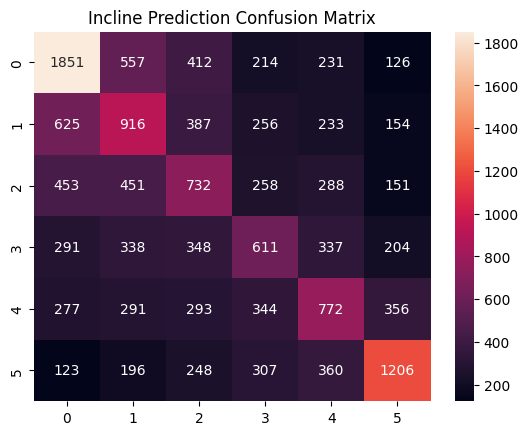

In [38]:
#evaluate the performance of our model
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True,fmt='d').set_title("Incline Prediction Confusion Matrix")

print(classification_report(y_test,predictions))